# Employee Turn Over - Data Exploration

Cleaning the data interim we have.

We can do Feature Engineering, Feature Selection in this process

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import joblib
import sys

sys.path.append('../../src/')

from theexplorer import eval_features, plot_compare
warnings.filterwarnings("ignore")

In [2]:
PATH_DATA='../../data/raw/'
PATH_DATA_INTERIM='../../data/iter2/interim/'
PATH_MODEL = '../../model/iter2/'

## Get Data

In [3]:
df1 = pd.read_csv(PATH_DATA_INTERIM+'iter2_interim_cln.csv')

In [4]:
df1

,unique_employee_ids,stillExists,companyAlias,is_train,vote_cnt,vote_avg,vote_std,vote_p50,vote_p75,votes_monday_cnt,...,vote_company_p50,vote_company_p75,comment_per_emp_avg,comment_len_per_emp_avg,comment_per_emp_p50,comment_len_per_emp_p50,gv_liked_per_emp_avg,gv_disliked_per_emp_avg,gv_liked_per_emp_p50,gv_disliked_per_emp_p50
0,512_56aec740f1ef260003e307d6,True,56aec740f1ef260003e307d6,0,4.0,2.500000,1.271135,2.5,3.25,1.0,...,4.0,4.0,40.497238,3133.790055,24.0,1522.0,105.754902,30.171569,35.5,4.0
1,-2_56aec740f1ef260003e307d6,False,56aec740f1ef260003e307d6,1,0.0,0.000000,0.000000,0.0,0.00,0.0,...,4.0,4.0,40.497238,3133.790055,24.0,1522.0,105.754902,30.171569,35.5,4.0
2,2_56aec740f1ef260003e307d6,True,56aec740f1ef260003e307d6,0,72.0,2.250000,1.031203,2.0,3.00,13.0,...,4.0,4.0,40.497238,3133.790055,24.0,1522.0,105.754902,30.171569,35.5,4.0
3,3_56aec740f1ef260003e307d6,True,56aec740f1ef260003e307d6,0,22.0,3.454545,0.738549,4.0,4.00,2.0,...,4.0,4.0,40.497238,3133.790055,24.0,1522.0,105.754902,30.171569,35.5,4.0
4,-4_56aec740f1ef260003e307d6,False,56aec740f1ef260003e307d6,1,0.0,0.000000,0.000000,0.0,0.00,0.0,...,4.0,4.0,40.497238,3133.790055,24.0,1522.0,105.754902,30.171569,35.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,857_58a728a0e75bda00042a3468,True,58a728a0e75bda00042a3468,1,1.0,3.000000,0.000000,3.0,3.00,0.0,...,3.0,3.0,9.088889,931.844444,6.5,360.0,35.469027,10.668142,19.5,4.0
4765,858_58a728a0e75bda00042a3468,True,58a728a0e75bda00042a3468,0,1.0,3.000000,0.000000,3.0,3.00,0.0,...,3.0,3.0,9.088889,931.844444,6.5,360.0,35.469027,10.668142,19.5,4.0
4766,859_58a728a0e75bda00042a3468,True,58a728a0e75bda00042a3468,1,1.0,4.000000,0.000000,4.0,4.00,0.0,...,3.0,3.0,9.088889,931.844444,6.5,360.0,35.469027,10.668142,19.5,4.0
4767,17_573a0671b5ec330003add34a,True,573a0671b5ec330003add34a,1,7.0,3.571429,0.534522,4.0,4.00,2.0,...,4.0,4.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [5]:
## we use 1 as turn over
df1['target'] = (df1.stillExists==False).astype(int)
col_exp = set(df1.columns)-set(['unique_employee_ids','stillExists','companyAlias','is_train','target'])

## Feature Variability

    Using Coefficient of Variation.
    The coefficient of variation (CV) is a statistical measure of the dispersion of data points in a data series around the mean. 
    
    drop with really low CoV --> almost zero

In [9]:
mf = df1[df1.is_train==1][col_exp].mean()
CoV = df1[df1.is_train==1][col_exp].std()/mf

CoV.sort_values()

vote_company_avg           0.090883
vote_company_p50           0.112142
vote_company_std           0.134395
vote_company_p75           0.143147
vote_p75                   0.388946
vote_avg                   0.392627
vote_p50                   0.415361
comment_per_emp_avg        0.449012
comment_per_emp_p50        0.499297
comment_len_per_emp_avg    0.619540
votes_monday_p75           0.621026
votes_monday_avg           0.624665
votes_monday_p50           0.639797
votes_friday_p75           0.650017
votes_friday_avg           0.654345
votes_friday_p50           0.668671
gv_liked_per_emp_avg       0.687487
comment_len_per_emp_p50    0.717370
vote_std                   0.745754
gv_disliked_per_emp_avg    0.778147
gv_disliked_per_emp_p50    0.870829
gv_liked_per_emp_p50       0.945505
vote_company_cnt           1.043783
turn_over_rate             1.117760
votes_monday_std           1.194962
acpt_likes_avg             1.202211
len_txt_p50                1.219928
votes_friday_std           1

## Base Explore

<!-- https://medium.com/model-monitoring-psi/population-stability-index-psi-ab133b0a5d42 -->

In [10]:
df_eval=eval_features(df1,col_label='target',col_features_selected=col_exp)

In [11]:
df_eval.sort_values('psi_score', ascending = False)[:15]

,features,gini,gini_abs,psi_score
26,vote_p75,-0.412564,0.412564,inf
48,vote_p50,-0.420633,0.420633,inf
8,vote_cnt,-0.485372,0.485372,inf
50,turn_over_rate,0.758020,0.758020,2.703229
33,comment_len_per_emp_p50,-0.216595,0.216595,2.050946
43,gv_disliked_per_emp_avg,0.198787,0.198787,1.952052
36,comment_len_per_emp_avg,0.087556,0.087556,1.781354
32,gv_liked_per_emp_avg,0.110409,0.110409,1.768887
40,comment_per_emp_avg,0.117082,0.117082,1.713922
42,vote_company_avg,-0.304337,0.304337,1.621311


## Breakdown

In [12]:
%matplotlib inline

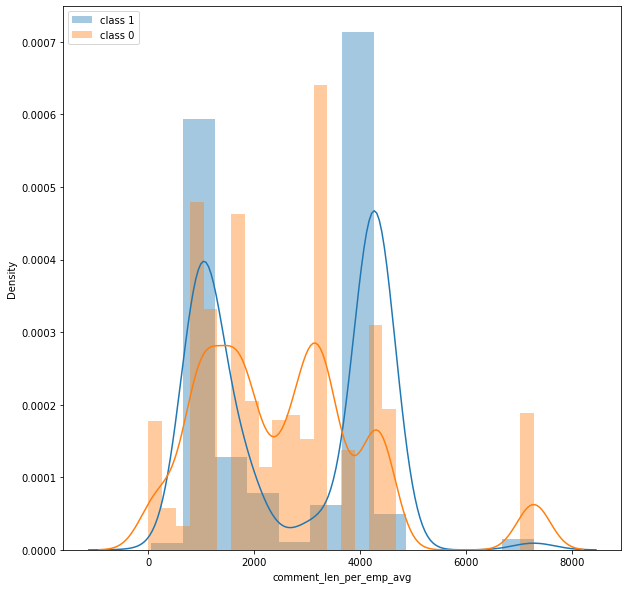

In [13]:
plot_compare(df1,'target','comment_len_per_emp_avg')

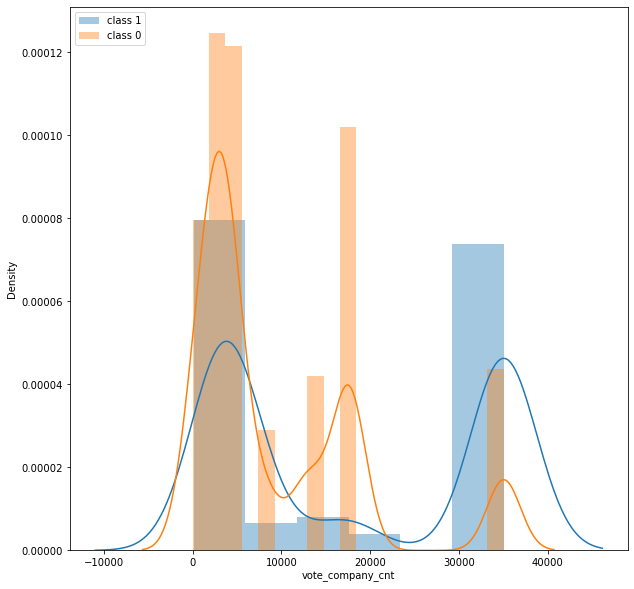

In [14]:
plot_compare(df1,'target','vote_company_cnt')

## Between Feature interaction

In [15]:
mc = df1[col_exp].corr()

<AxesSubplot:>

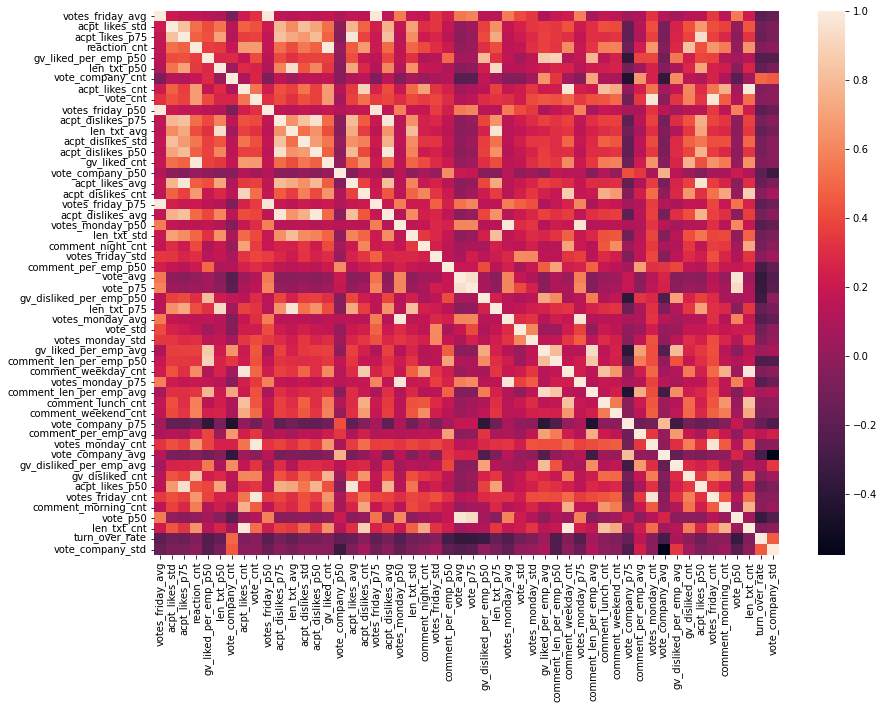

In [16]:
plt.figure(figsize = (14,10))
sns.heatmap(mc)

In [17]:
df_mc = mc.unstack().reset_index()
df_mc_high = df_mc[(df_mc['level_0']!=df_mc['level_1'])&(df_mc[0]>0.9)]
df_mc_high

,level_0,level_1,0
9,votes_friday_avg,votes_friday_p50,0.988418
18,votes_friday_avg,votes_friday_p75,0.982321
120,acpt_likes_p75,acpt_likes_avg,0.978956
149,acpt_likes_p75,acpt_likes_p50,0.947307
170,reaction_cnt,gv_liked_cnt,0.991470
271,len_txt_p50,len_txt_avg,0.946098
288,len_txt_p50,len_txt_p75,0.921564
398,acpt_likes_cnt,comment_weekday_cnt,0.975489
413,acpt_likes_cnt,len_txt_cnt,0.985076
457,vote_cnt,votes_monday_cnt,0.982118


In [18]:
df_mc_high.shape[0]/2

26.0

In [ ]:
## Correlation vs Causation